## Fichier dédié à l'établissement du modèle de régression linéaire

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from scipy.stats import pearsonr
import qsar_utils as qu

### Chargement des données

In [2]:
df_norm = pd.read_csv("data/qsar_fish_toxicity_norm.csv")
df_raw = pd.read_csv("data/qsar_fish_toxicity.csv")
df_LC50 = df_norm["LC50"]
df_norm = df_norm.drop(columns = "LC50")
df_raw = df_raw.drop(columns="LC50")

### Etablissement du Leave-one-out pour l'entrainement sur le modèle Linéaire

In [3]:
def LOO_LC50(df : pd.DataFrame, df_LC50 : pd.DataFrame) -> tuple[list[float], float]:
    """
    Cette fonction permet d'effectuer un Leave one Out sur des données pandas et de l'appliquer à un modèle Linéaire pour
    prédire la valeur de la LC50 d'une molécule
    df : tableau pandas avec les données
    df_LC50 : tableau pandas avec les valeurs de la LC50
    """
    loo = LeaveOneOut() # initialisation du LeaveOneOut
    predicted_LC50 = list()
    for train_index, test_index in loo.split(df): # parcours des index sélectionnés par le leave one out
        model = LinearRegression().fit(df.iloc[train_index], df_LC50.iloc[train_index])
        predict = model.predict(df.iloc[test_index])
        predicted_LC50.append(predict[0])
    corr_coef, _ = pearsonr(df_LC50, predicted_LC50) # calcul du coefficients de corrélation
    return predicted_LC50, corr_coef

In [4]:
predicted_LC50_norm, corr_norm = LOO_LC50(df_norm, df_LC50)
predicted_LC50_raw, corr_raw = LOO_LC50(df_raw, df_LC50)

## Visualisation du résultat

### Droite de régression pour les données normalisées

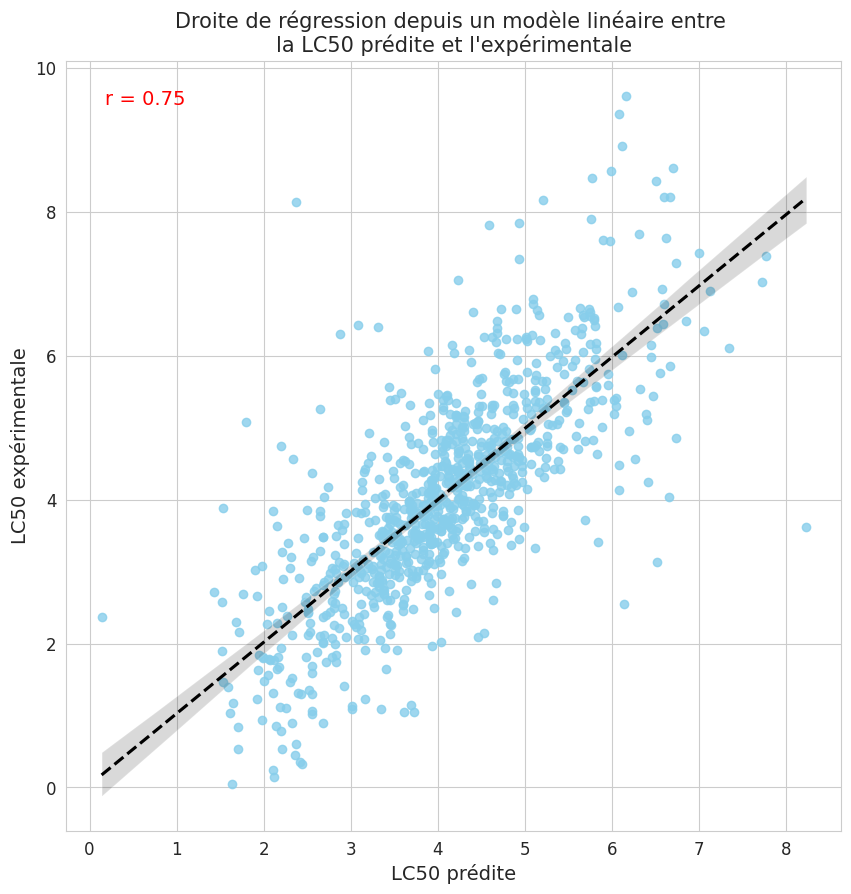

In [5]:
qu.scatter_QSAR(x_data = predicted_LC50_norm, y_data = df_LC50, corr_coef = corr_norm)

### Droite de régression pour les données brutes

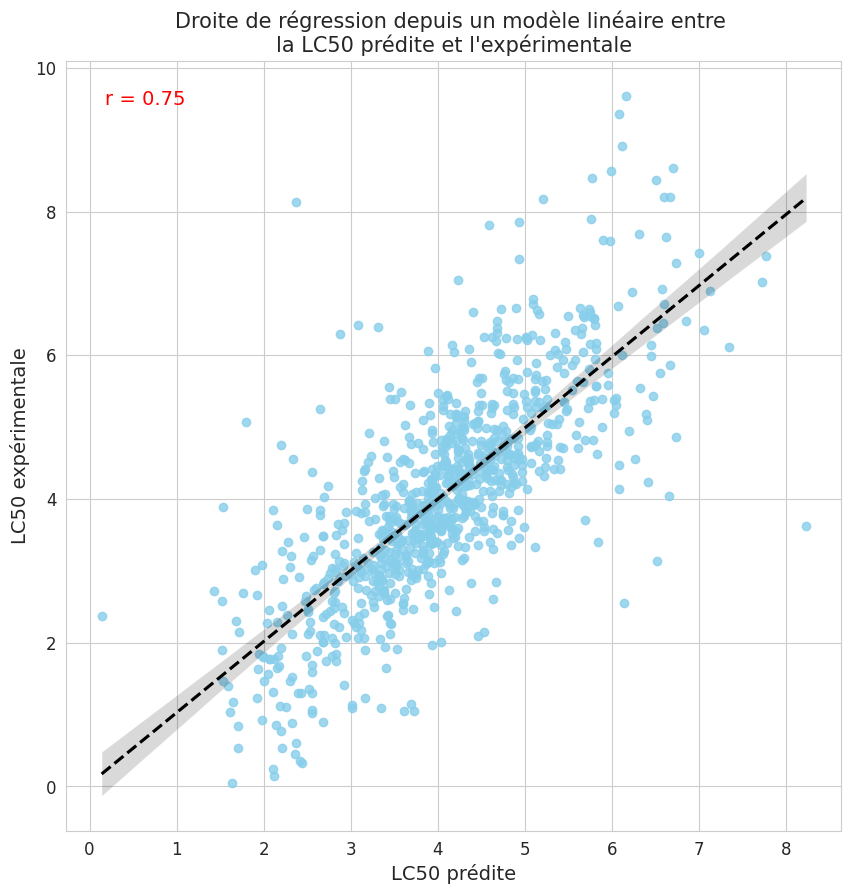

In [6]:
qu.scatter_QSAR(x_data = predicted_LC50_raw, y_data = df_LC50, corr_coef=corr_raw)

Les performances du modèle linéaire ne semblent pas impactés par la normalisation. Cela peut être dû par le fait que seulement 4 colonnes ont été normalisées (les autres sont des variables catégoriques) ou bien par la nature du modèle linéaire qui ignore la normalisation